In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('000520', '2018-01-01', '2019-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
470,2019-11-30,9405.676967,8083.029447,10707.062971
471,2019-12-01,9292.501154,7956.148187,10616.271848
472,2019-12-02,9704.688153,8490.864973,11017.005568
473,2019-12-03,9650.135852,8357.372795,10941.693755
474,2019-12-04,9463.839603,8060.780666,10645.538474
475,2019-12-05,9359.528516,8090.088875,10596.896098
476,2019-12-06,9353.974075,7946.579938,10629.596194
477,2019-12-07,8748.888145,7337.275339,10084.001888
478,2019-12-08,8688.612664,7451.842320,9979.955767
479,2019-12-09,9158.535467,7873.260811,10481.063110


시각화

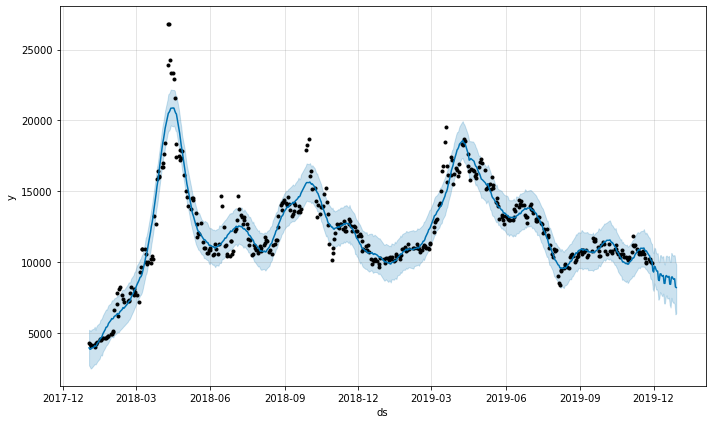

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

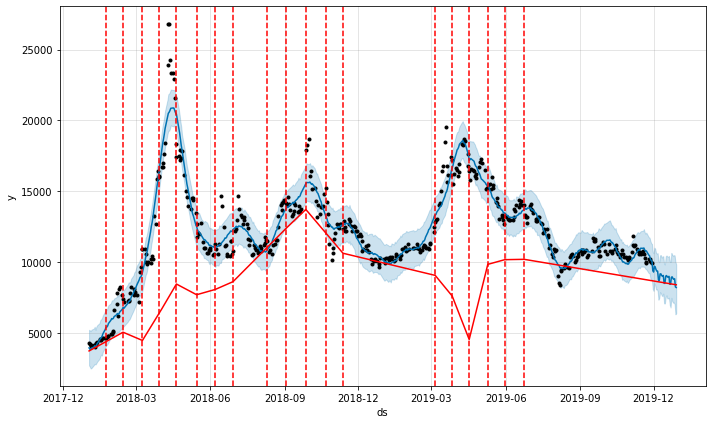

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:470]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

1001.9561711611301

In [9]:
B = fdr.DataReader('000520', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,9875,10025,9875,9900,16017,-0.005025
2019-12-03,10000,10350,9950,10075,34448,0.017677
2019-12-04,10100,10100,9925,9925,17736,-0.014888
2019-12-05,10050,10200,9900,9900,29019,-0.002519
2019-12-06,10000,10600,9900,10275,96864,0.037879
2019-12-09,10275,10275,10000,10050,24692,-0.021898
2019-12-10,10050,10100,10000,10075,19905,0.002488
2019-12-11,10025,10125,9950,10075,35699,0.000000
2019-12-12,10150,10200,9925,10025,21047,-0.004963


In [10]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [11]:
B['ds'] = B.index

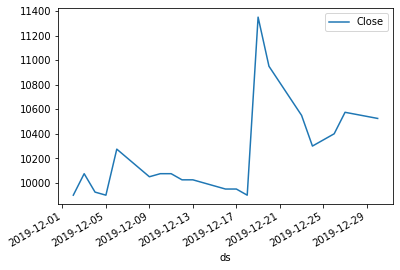

In [12]:
B.plot(x='ds', y='Close')

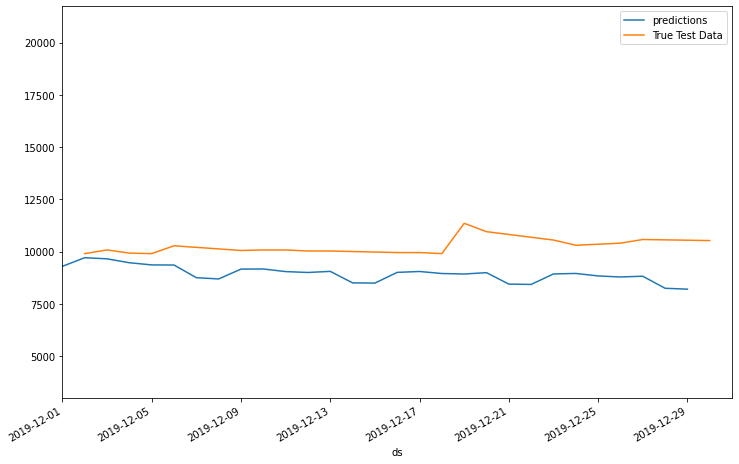

In [13]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2019-12-01', '2019-12-31'))